In [26]:
# import module
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from pylab import rcParams
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib as plt
%matplotlib inline

In [27]:
# import file
raw_data = pd.read_csv('C:/Users/USER/Desktop/data scient sheet/UCI DATA SET/Custer/Review Rating/google_review_ratings.csv')
# pd.set_option('display.max_columns', None) 
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [28]:
# find missing value and clean data
raw_data.drop('Unnamed: 25', axis =1, inplace = True)
raw_data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [29]:
raw_data.dropna(inplace=True)

In [30]:
# covert object type to float
raw_data['Category 11'] = raw_data['Category 11'].astype(float)
print(raw_data.dtypes)

User            object
Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object


In [31]:
data_clean = raw_data.drop('User', axis = 1)
data_clean

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [32]:
# Descriptive statistics 
data_clean.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [33]:
# import K-mean
from sklearn.cluster import KMeans
#predict the labels of clusters.
label = kmeans.fit_predict(data_clean)
print(label)

[4 4 4 ... 2 2 0]


In [34]:
# from data set we must divide data to 5 group 
kmeans = KMeans(5)
kmeans.fit(data_clean)


KMeans(n_clusters=5)

In [35]:
data_clean.columns

Index(['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24'],
      dtype='object')

In [36]:
features =['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10',
       'Category 11', 'Category 12', 'Category 13', 'Category 14',
       'Category 15', 'Category 16', 'Category 17', 'Category 18',
       'Category 19', 'Category 20', 'Category 21', 'Category 22',
       'Category 23', 'Category 24']

In [37]:
tableA = pd.DataFrame(kmeans.cluster_centers_, columns=features).T
tableA

,0,1,2,3,4
Category 1,1.173052,1.634257,2.344808,1.351449,0.945698
Category 2,1.971099,2.223989,2.703955,2.835571,1.485084
Category 3,1.769442,3.106265,2.500309,2.990917,1.965106
Category 4,2.049662,4.295328,2.234595,3.426174,1.935564
Category 5,2.165943,4.072664,2.045917,4.038338,1.994827
Category 6,2.712172,3.182597,1.872495,3.810302,2.229285
Category 7,3.993964,2.723842,1.930853,3.891520,3.494615
Category 8,3.721471,2.193829,1.562196,2.537102,2.304704
Category 9,4.647320,2.665248,1.755608,2.992064,3.192291
Category 10,4.480279,2.712838,1.567388,2.390254,2.917017


In [38]:
kmeans.cluster_centers_.shape

(5, 24)

In [39]:
# find the maximum values of each row
maxValues =tableA.max(axis = 1)
print(maxValues)

Category 1     2.344808
Category 2     2.835571
Category 3     3.106265
Category 4     4.295328
Category 5     4.072664
Category 6     3.810302
Category 7     3.993964
Category 8     3.721471
Category 9     4.647320
Category 10    4.480279
Category 11    3.659003
Category 12    3.328983
Category 13    3.783330
Category 14    4.738804
Category 15    4.244391
Category 16    1.583454
Category 17    1.757772
Category 18    1.871631
Category 19    2.540117
Category 20    2.136802
Category 21    1.863827
Category 22    4.722115
Category 23    2.545448
Category 24    2.623774
dtype: float64


In [40]:
# find the column name of maximum
# values in every row
maxValueIndex = tableA.idxmax(axis = 1)
 
print("Max values of row are at following columns :")
print(maxValueIndex)

Max values of row are at following columns :
Category 1     2
Category 2     3
Category 3     1
Category 4     1
Category 5     1
Category 6     3
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    4
Category 13    4
Category 14    4
Category 15    4
Category 16    2
Category 17    2
Category 18    2
Category 19    2
Category 20    2
Category 21    2
Category 22    1
Category 23    1
Category 24    2
dtype: int64


In [41]:
C = pd.DataFrame(maxValueIndex, columns=['Label'])
C.index.names = ['Catrgory']
C

,Label
Catrgory,
Category 1,2
Category 2,3
Category 3,1
Category 4,1
Category 5,1
Category 6,3
Category 7,0
Category 8,0
Category 9,0


In [45]:
C.to_csv('C:/Users/USER/Desktop/data scient sheet/UCI DATA SET/Custer/Review Rating/ Rating Data.csv')


2    8
0    5
1    5
4    4
3    2
Name: Label, dtype: int64
Rating of Catagory :  43


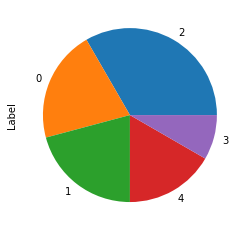

In [43]:
print(C['Label'].value_counts())
C['Label'].value_counts().plot.pie();
print('Rating of Catagory : ', C['Label'].sum())

In [147]:
# Finnally with K-mean fuction we get a data sumary that on upper line we find the most rating is Category 14, 15 (hotels/other lodgings, juice bars)
# we must try to improve with create Centroid and label

In [9]:
# import K-mean
from sklearn.cluster import KMeans
#predict the labels of clusters.
#Initialize the class object
kmeans = KMeans(n_clusters= 5 )
label =  kmeans.fit_predict(data_clean)
print(label)

[3 3 3 ... 1 1 0]


In [15]:
import matplotlib.pyplot as plt
#filter rows of original data
filtered_label0 = data_clean[label == 0]

In [13]:
label_0 = data_clean[label == 0]
label_1 = data_clean[label == 1]
label_2 = data_clean[label == 2]
label_3 = data_clean[label == 3]


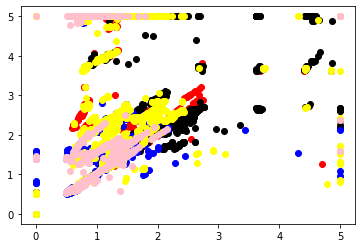

In [16]:
label_4 = data_clean[label == 4]

cols = filtered_label0.columns

plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'blue')
plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'yellow')
plt.scatter(label_4[cols[0]], label_4[cols[1]], color = 'pink')
plt.show()

In [ ]:
# type Label with random